In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import minimize

In [36]:
def scm_fit(X, y):
    # TODO fix to remove intercept stuff
    """
    Fits a linear regression model with the constraint that the weights are nonnegative and sum to one.

    Args:
        X (np.ndarray): Input features, shape (n_samples, n_features).
        y (np.ndarray): Target values, shape (n_samples,).
    Returns:
        np.ndarray: Optimized weights, shape (n_features).
    """
    n_features = X.shape[1]

    # Objective function: Mean Squared Error
    def objective_function(weights):
        y_predicted = np.dot(X, weights)
        return np.mean((y_predicted - y) ** 2)

    # Constraint: sum(weights) == weight_sum_constraint
    def sum_constraint(weights):
        return np.sum(weights[1:]) - 1

    # Bounds: Ensure all weights are nonnegative
    bounds = [(0, 1)] * n_features

    # Initial guess for weights
    initial_weights = np.ones(n_features) / (n_features)

    # Define constraints as a dictionary
    constraints = ({'type': 'eq', 'fun': sum_constraint})

    # Use the minimize function to find the optimized weights
    result = minimize(objective_function, initial_weights, method='SLSQP', bounds=bounds, constraints=constraints)

    # Extract the optimized weights
    optimized_weights = result.x

    return optimized_weights


In [4]:
df = pd.read_csv('../data/estimates/SNAP_gap_estimates/snap_gap_estimates.csv', index_col = 0)
df

,YEAR,STATEFIPS,SNAP Gap
0,2006,1,0.744864
1,2006,2,0.795289
2,2006,4,0.810071
3,2006,5,0.703737
4,2006,6,0.883711
...,...,...,...
895,2023,51,0.755342
896,2023,53,0.697170
897,2023,54,0.581461
898,2023,55,0.687052


In [6]:
pivoted = df.pivot_table(values = "SNAP Gap", index = "YEAR", columns= "STATEFIPS")
pivoted

STATEFIPS,1,2,4,5,6,8,9,10,12,13,...,46,47,48,49,50,51,53,54,55,56
YEAR,,,,,,,,,,,,,,,,,,,,,
2006,0.744864,0.795289,0.810071,0.703737,0.883711,0.877681,0.850713,0.818268,0.812988,0.784570,...,0.829396,0.681241,0.776842,0.898557,0.799117,0.836928,0.800584,0.659382,0.839910,0.877172
2007,0.744663,0.799672,0.814151,0.713016,0.880043,0.880229,0.848540,0.809980,0.838378,0.786837,...,0.821524,0.681369,0.795202,0.904792,0.779807,0.835916,0.800272,0.660036,0.833979,0.891130
2008,0.729857,0.798164,0.793345,0.712320,0.871133,0.879911,0.838345,0.793262,0.813697,0.779550,...,0.818391,0.671359,0.788154,0.900998,0.755364,0.827122,0.786991,0.633479,0.813439,0.895059
2009,0.689102,0.787825,0.745325,0.695696,0.848752,0.854344,0.820696,0.752801,0.763857,0.733885,...,0.796536,0.630523,0.759441,0.871577,0.694896,0.803361,0.727690,0.615544,0.770331,0.878470
2010,0.647219,0.756652,0.672678,0.666514,0.822118,0.819331,0.771012,0.707464,0.696174,0.672293,...,0.737948,0.587807,0.718914,0.831657,0.648120,0.769629,0.671757,0.578400,0.698064,0.845516
2011,0.599665,0.720863,0.661416,0.655911,0.802299,0.797278,0.742073,0.656153,0.648453,0.639113,...,0.706489,0.573024,0.692681,0.809290,0.624438,0.748510,0.642525,0.582962,0.675219,0.841567
2012,0.598476,0.711080,0.644106,0.642083,0.786988,0.785494,0.728569,0.621230,0.621871,0.614838,...,0.725979,0.557886,0.689910,0.815006,0.614153,0.735277,0.621008,0.570937,0.659693,0.857272
2013,0.599004,0.699826,0.656907,0.646538,0.778373,0.778544,0.715927,0.624725,0.603064,0.610502,...,0.733141,0.554081,0.693038,0.837090,0.588050,0.734443,0.634779,0.572389,0.649685,0.842479
2014,0.603580,0.722927,0.679492,0.651345,0.770348,0.783807,0.701497,0.618074,0.610753,0.614123,...,0.737461,0.573778,0.710986,0.850270,0.615974,0.741442,0.640421,0.555673,0.655940,0.852181


In [7]:
training_data = pivoted[pivoted.index <= 2021]
training_data

STATEFIPS,1,2,4,5,6,8,9,10,12,13,...,46,47,48,49,50,51,53,54,55,56
YEAR,,,,,,,,,,,,,,,,,,,,,
2006,0.744864,0.795289,0.810071,0.703737,0.883711,0.877681,0.850713,0.818268,0.812988,0.784570,...,0.829396,0.681241,0.776842,0.898557,0.799117,0.836928,0.800584,0.659382,0.839910,0.877172
2007,0.744663,0.799672,0.814151,0.713016,0.880043,0.880229,0.848540,0.809980,0.838378,0.786837,...,0.821524,0.681369,0.795202,0.904792,0.779807,0.835916,0.800272,0.660036,0.833979,0.891130
2008,0.729857,0.798164,0.793345,0.712320,0.871133,0.879911,0.838345,0.793262,0.813697,0.779550,...,0.818391,0.671359,0.788154,0.900998,0.755364,0.827122,0.786991,0.633479,0.813439,0.895059
2009,0.689102,0.787825,0.745325,0.695696,0.848752,0.854344,0.820696,0.752801,0.763857,0.733885,...,0.796536,0.630523,0.759441,0.871577,0.694896,0.803361,0.727690,0.615544,0.770331,0.878470
2010,0.647219,0.756652,0.672678,0.666514,0.822118,0.819331,0.771012,0.707464,0.696174,0.672293,...,0.737948,0.587807,0.718914,0.831657,0.648120,0.769629,0.671757,0.578400,0.698064,0.845516
2011,0.599665,0.720863,0.661416,0.655911,0.802299,0.797278,0.742073,0.656153,0.648453,0.639113,...,0.706489,0.573024,0.692681,0.809290,0.624438,0.748510,0.642525,0.582962,0.675219,0.841567
2012,0.598476,0.711080,0.644106,0.642083,0.786988,0.785494,0.728569,0.621230,0.621871,0.614838,...,0.725979,0.557886,0.689910,0.815006,0.614153,0.735277,0.621008,0.570937,0.659693,0.857272
2013,0.599004,0.699826,0.656907,0.646538,0.778373,0.778544,0.715927,0.624725,0.603064,0.610502,...,0.733141,0.554081,0.693038,0.837090,0.588050,0.734443,0.634779,0.572389,0.649685,0.842479
2014,0.603580,0.722927,0.679492,0.651345,0.770348,0.783807,0.701497,0.618074,0.610753,0.614123,...,0.737461,0.573778,0.710986,0.850270,0.615974,0.741442,0.640421,0.555673,0.655940,0.852181


In [8]:
training_y = training_data[25]
training_X = training_data.loc[:, training_data.columns != 25].values

In [12]:
weights = scm_fit(training_X, training_y, weight_sum_constraint = 1)
weights

array([2.00000000e-02, 1.30561022e-18, 6.95381920e-02, 3.62796434e-02,
       5.35909460e-18, 7.79550883e-02, 8.32016839e-02, 3.97083938e-18,
       4.58680623e-18, 1.30104261e-18, 1.46620100e-02, 6.24187133e-02,
       4.77868587e-19, 7.87388303e-02, 1.51025939e-03, 1.94828853e-18,
       1.24351680e-18, 0.00000000e+00, 1.18933784e-18, 2.60353416e-02,
       7.87487532e-02, 4.32267561e-03, 2.78091904e-02, 3.34356423e-19,
       3.82646372e-03, 1.40519096e-19, 5.30342615e-03, 5.15914732e-02,
       0.00000000e+00, 4.53838084e-03, 1.19209018e-01, 3.83661849e-02,
       6.42585815e-18, 3.00460119e-02, 1.06040217e-02, 3.32008181e-02,
       3.06557329e-18, 2.39733592e-02, 1.86728816e-18, 0.00000000e+00,
       0.00000000e+00, 0.00000000e+00, 3.66438118e-18, 9.32247879e-03,
       1.66652701e-03, 2.06386693e-02, 1.26163060e-02, 0.00000000e+00,
       5.16303933e-02, 2.22460863e-02])

In [13]:
X = pivoted.loc[:, pivoted.columns != 25].values
y = pivoted[25]

In [ ]:
synth = X @ weights
synth

array([0.81914691, 0.81966035, 0.80765727, 0.77749691, 0.7356081 ,
       0.71017631, 0.69286806, 0.6882754 , 0.69252569, 0.69421236,
       0.69731388, 0.70616327, 0.71058519, 0.73604338, 0.70058669,
       0.69501229, 0.68650743, 0.67910134])

In [15]:
diffs = y[-2:] - synth[-2:]
diffs

YEAR
2022   -0.056029
2023   -0.088811
Name: 25, dtype: float64

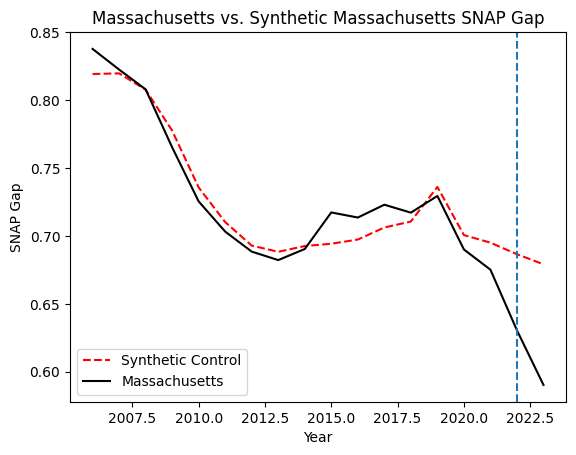

In [45]:
plt.plot(pivoted.index.astype(int), synth, label = "Synthetic Control", linestyle = '--', color = 'red')
plt.plot(pivoted.index.astype(int), y, label = "Massachusetts", linestyle = '-', color = 'black')
plt.axvline(x = 2022, linestyle = '--')
plt.legend()
plt.title("Massachusetts vs. Synthetic Massachusetts SNAP Gap")
plt.xlabel("Year")
plt.ylabel("SNAP Gap")
plt.savefig('../output/synthetic_control_plots/no_covariates_real_vs_synthetic.png')

In [ ]:
non_zero_weights = np.where(weights>0.00000000001)
non_zero_weights = non_zero_weights[0]

In [19]:
import us

def fips_to_state(fips_code, return_type='abbr'):
    """
    Converts a state FIPS code to its corresponding state abbreviation or name.

    Args:
        fips_code (str): A two-digit FIPS code representing a state.
        return_type (str, optional): Specifies the return type, either 'abbr' for abbreviation (default) or 'name' for full name.

    Returns:
        str: The state abbreviation or name corresponding to the FIPS code.
             Returns None if the FIPS code is invalid.
    """
    fips_code = str(fips_code)
    if len(fips_code) == 1:
        fips_code = '0' + fips_code
    state = us.states.lookup(fips_code)
    if state:
        if return_type == 'abbr':
            return state.abbr
        elif return_type == 'name':
            return state.name
        else:
             raise ValueError("Invalid return_type. Choose 'abbr' or 'name'.")
    return None


In [20]:
synthetic_cols = training_data.columns.to_list()
synthetic_cols.remove(25)

In [ ]:
non_zero_weights_dict = {}

for state in non_zero_weights:
    weight = weights[state]
    state = synthetic_cols[state]
    state_name = fips_to_state(state, 'name')
    non_zero_weights_dict[state_name] = weight

In [22]:
non_zero_weights_dict

{'Alaska': np.float64(0.06953819198774924),
 'Arizona': np.float64(0.03627964338940045),
 'California': np.float64(0.07795508829811246),
 'Colorado': np.float64(0.08320168389112438),
 'Georgia': np.float64(0.014662010005061458),
 'Hawaii': np.float64(0.062418713260400244),
 'Illinois': np.float64(0.07873883031051936),
 'Indiana': np.float64(0.001510259392659382),
 'Maine': np.float64(0.026035341597226792),
 'Maryland': np.float64(0.07874875324910438),
 'Michigan': np.float64(0.004322675611693823),
 'Minnesota': np.float64(0.027809190389271175),
 'Missouri': np.float64(0.0038264637191116474),
 'Nebraska': np.float64(0.005303426152165705),
 'Nevada': np.float64(0.05159147315148454),
 'New Jersey': np.float64(0.00453838083879997),
 'New Mexico': np.float64(0.11920901817692828),
 'New York': np.float64(0.03836618487001178),
 'North Dakota': np.float64(0.030046011917160886),
 'Ohio': np.float64(0.010604021685037296),
 'Oklahoma': np.float64(0.0332008181257514),
 'Pennsylvania': np.float64(0

In [34]:
pivoted[pivoted.index <= 2021].loc[:, (training_data.columns != state) & (training_data.columns != 25)]

STATEFIPS,2,4,5,6,8,9,10,12,13,15,...,46,47,48,49,50,51,53,54,55,56
YEAR,,,,,,,,,,,,,,,,,,,,,
2006,0.795289,0.810071,0.703737,0.883711,0.877681,0.850713,0.818268,0.812988,0.784570,0.834160,...,0.829396,0.681241,0.776842,0.898557,0.799117,0.836928,0.800584,0.659382,0.839910,0.877172
2007,0.799672,0.814151,0.713016,0.880043,0.880229,0.848540,0.809980,0.838378,0.786837,0.820729,...,0.821524,0.681369,0.795202,0.904792,0.779807,0.835916,0.800272,0.660036,0.833979,0.891130
2008,0.798164,0.793345,0.712320,0.871133,0.879911,0.838345,0.793262,0.813697,0.779550,0.811139,...,0.818391,0.671359,0.788154,0.900998,0.755364,0.827122,0.786991,0.633479,0.813439,0.895059
2009,0.787825,0.745325,0.695696,0.848752,0.854344,0.820696,0.752801,0.763857,0.733885,0.783267,...,0.796536,0.630523,0.759441,0.871577,0.694896,0.803361,0.727690,0.615544,0.770331,0.878470
2010,0.756652,0.672678,0.666514,0.822118,0.819331,0.771012,0.707464,0.696174,0.672293,0.754096,...,0.737948,0.587807,0.718914,0.831657,0.648120,0.769629,0.671757,0.578400,0.698064,0.845516
2011,0.720863,0.661416,0.655911,0.802299,0.797278,0.742073,0.656153,0.648453,0.639113,0.729501,...,0.706489,0.573024,0.692681,0.809290,0.624438,0.748510,0.642525,0.582962,0.675219,0.841567
2012,0.711080,0.644106,0.642083,0.786988,0.785494,0.728569,0.621230,0.621871,0.614838,0.697923,...,0.725979,0.557886,0.689910,0.815006,0.614153,0.735277,0.621008,0.570937,0.659693,0.857272
2013,0.699826,0.656907,0.646538,0.778373,0.778544,0.715927,0.624725,0.603064,0.610502,0.677667,...,0.733141,0.554081,0.693038,0.837090,0.588050,0.734443,0.634779,0.572389,0.649685,0.842479
2014,0.722927,0.679492,0.651345,0.770348,0.783807,0.701497,0.618074,0.610753,0.614123,0.668898,...,0.737461,0.573778,0.710986,0.850270,0.615974,0.741442,0.640421,0.555673,0.655940,0.852181


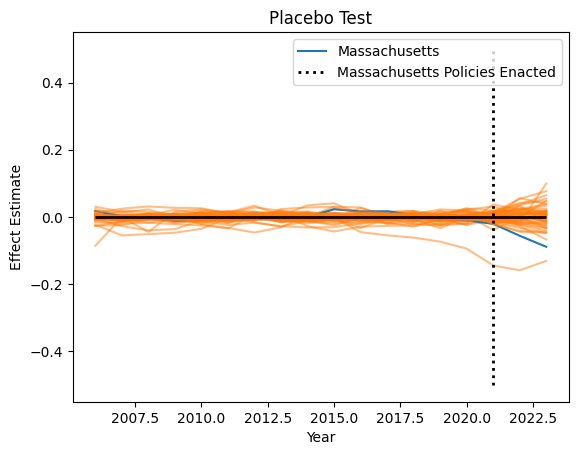

In [ ]:
def run_trial(state):
    # TODO add something to only include placebos with good synthetic controls
    training_data = pivoted[pivoted.index <= 2021]
    training_y = training_data[state]
    training_X = training_data.loc[:, (training_data.columns != state) & (training_data.columns != 25)].values
    weights = scm_fit(training_X, training_y)
    X = pivoted.loc[:, (pivoted.columns != state) & (pivoted.columns != 25)].values
    y = pivoted[state]
    synth = X @ weights
    diffs = y - synth
    return diffs

effects = {}

for state in pivoted.columns: 
    effect = run_trial(state)
    effects[state] = effect
    
    is_mass = state == 25
    
    plt.plot(effect,
             color="C0" if is_mass else "C1",
             alpha=1 if is_mass else 0.5,
             label="Massachusetts" if is_mass else None)

plt.hlines(y=0, xmin=2006, xmax=2023, lw=2, color="Black")
plt.vlines(x=2021, ymin=-0.5, ymax=0.5, linestyle=":", lw=2, label="Massachusetts Policies Enacted", color="Black")
plt.ylabel("Effect Estimate")
plt.title("Placebo Test")
plt.xlabel("Year")
plt.legend()

In [40]:
effects_df = pd.DataFrame(effects)
effects_df

,1,2,4,5,6,8,9,10,12,13,...,46,47,48,49,50,51,53,54,55,56
YEAR,,,,,,,,,,,,,,,,,,,,,
2006,0.009165,-0.003943,0.004799,-0.026530,-0.002498,-0.003582,-0.003503,0.003857,-0.004965,-0.001677,...,0.003391,-0.012799,-0.008603,-0.002098,0.023379,0.001345,0.003878,-0.023428,0.007823,-0.026697
2007,0.002812,-0.010116,0.008135,-0.024509,-0.007210,-0.003914,-0.006191,-0.004707,0.019144,-0.000650,...,-0.006415,-0.015618,0.003115,0.003309,0.004594,-0.002933,0.003791,-0.054879,0.001034,-0.014686
2008,0.007081,0.001045,0.003611,-0.007654,-0.006921,0.005679,-0.001463,0.002407,0.014656,0.010674,...,0.001851,-0.007238,0.008850,0.007421,-0.000186,-0.001464,0.008900,-0.051344,-0.001279,0.000616
2009,-0.001035,0.008310,-0.003520,-0.001978,-0.002568,0.002824,0.011076,-0.000269,0.007550,0.007217,...,0.008690,-0.014812,0.000308,0.000511,-0.018689,-0.001504,-0.007271,-0.046927,0.002158,0.003948
2010,0.004997,0.012231,-0.021729,0.003137,0.010495,0.003382,0.005365,0.011504,0.001544,-0.000137,...,-0.008967,-0.014001,-0.002405,-0.006709,-0.008670,0.002283,-0.007138,-0.035488,-0.012488,0.000071
2011,-0.017529,-0.004432,-0.003138,0.006651,0.017705,0.005347,0.007509,-0.001172,-0.003404,-0.000581,...,-0.018363,-0.009568,-0.008508,-0.013020,0.000135,0.003098,-0.004340,-0.003636,0.000672,0.013321
2012,-0.000066,-0.003342,-0.007629,0.005476,0.014900,0.004122,0.012990,-0.009133,0.000835,-0.003759,...,0.009777,-0.006751,-0.001339,-0.006972,0.010010,-0.001264,-0.007861,0.011402,0.004959,0.033203
2013,0.001674,-0.015320,0.004836,0.006614,0.013384,0.001455,0.006136,0.007507,-0.014381,-0.003734,...,0.014794,-0.011010,0.000001,0.009244,-0.016171,-0.002129,0.009359,0.007024,-0.000258,0.005603
2014,-0.005826,-0.000693,0.009983,-0.009138,0.003792,0.001344,-0.008521,-0.006773,-0.011311,-0.011246,...,0.004699,-0.013024,0.007178,0.009323,-0.009697,-0.006025,-0.000202,-0.027741,-0.006537,0.000735


In [41]:
pre_to_post = effects_df.loc[2023,:] - effects_df.loc[2021,:]
pre_post_diff = pd.DataFrame(pre_to_post)
pre_post_diff['abs'] = pre_post_diff[0].abs()
pre_post_diff.sort_values('abs', ascending=False)

,0,abs
2,0.099274,0.099274
24,0.068669,0.068669
25,-0.068419,0.068419
15,0.065130,0.065130
5,0.063336,0.063336
6,-0.056298,0.056298
47,0.044953,0.044953
12,0.040094,0.040094
23,-0.036623,0.036623
32,-0.036473,0.036473
